# Interval estimator

In [1]:
y <- 26
n <- 100

### frequentist

In [10]:
pF <- y / n
varF <- pF * (1 - pF) / n
min <- pF - qnorm(0.975) * sqrt(varF)
max <- pF + qnorm(0.975) * sqrt(varF)

In [11]:
cat(paste("frequentist estimator is: ", pF, "+-", qnorm(0.975) * sqrt(varF), '\n'))
cat(paste(min, '-', max))

frequentist estimator is:  0.26 +- 0.0859707320604838 
0.174029267939516 - 0.345970732060484

### Bayesian

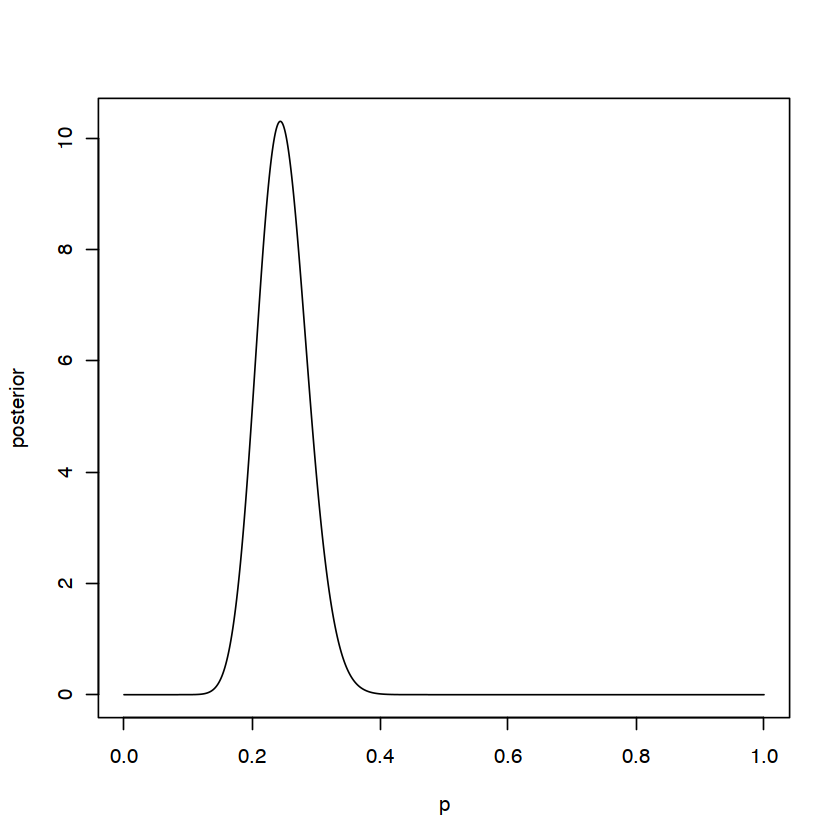

In [15]:
p <- seq(0, 1, 0.001)
prior <- dbeta(p, 4.8, 19.2)
posterior <- dbeta(p, 4.8 + y, 19.2 + n - y)

plot(p, posterior, type = 'l')

In [17]:
pB <- p[which.max(posterior)]
minB <- qbeta(0.025, 4.8 + y, 19.2 + n - y)
maxB <- qbeta(0.975, 4.8 + y, 19.2 + n - y)

In [18]:
cat(paste("bayesian estimator is: ", pB, '\n'))
cat(paste(minB, '-', maxB))

bayesian estimator is:  0.244 
0.176686486611358 - 0.32777229163501

# One- side hypothesis test

In [48]:
p_0 <- 0.6  # patient with standard treatment
n <- 10
y <- 8  # benefit the nwe treatment
alpha <- 0.05

$H_0$: new test is not different to the old one, $p_0 \leq 0.6$

### frequentist

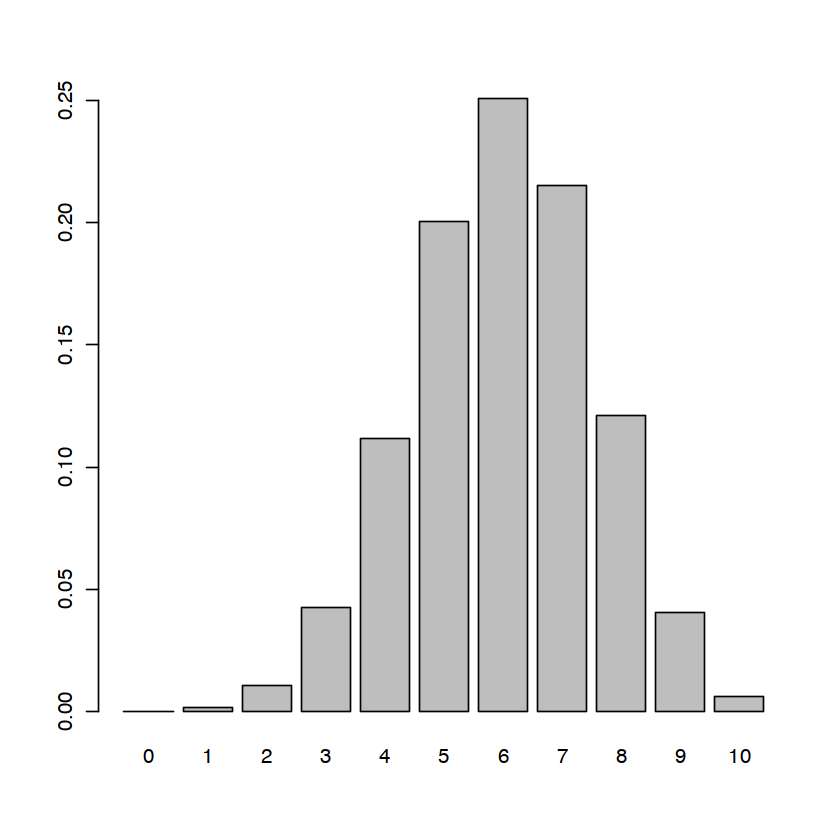

In [32]:
func <- dbinom(0:n, n, p_0)
barplot(func, names = 0:n)

In [50]:
dbinom(y, n, p_0)
cat(paste("The p-value is obviously larger than alpha (0.05), so we cannot reject the null hypothesis"))

[1] 0.1209324

The p-value is obviously larger than alpha (0.05), so we cannot reject the null hypothesis

### Bayesian

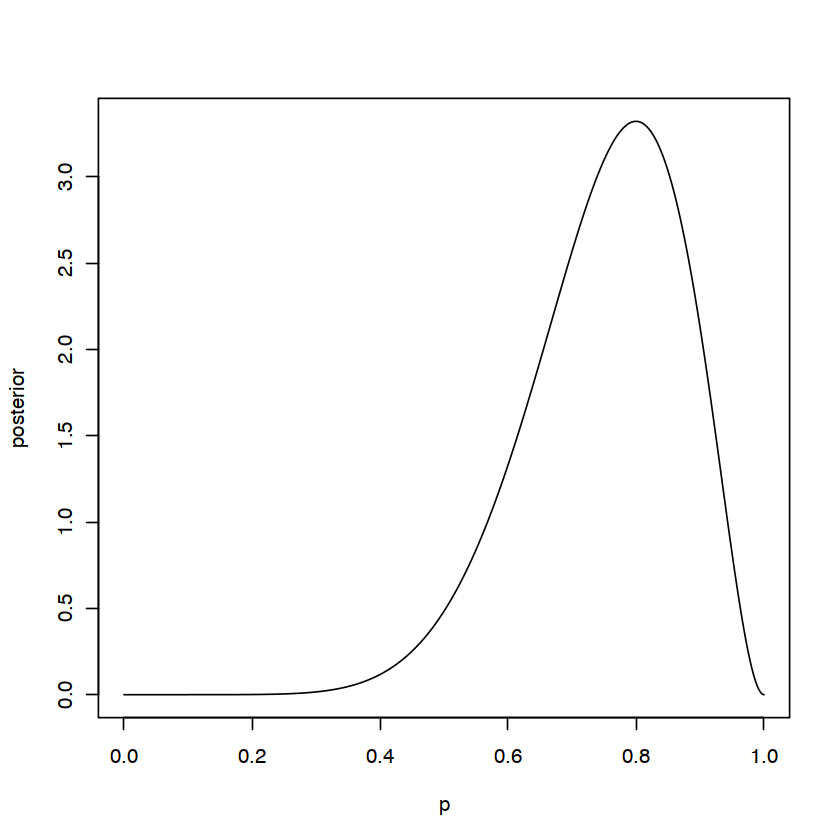

In [37]:
p <- seq(0, 1, 0.001)
# prior: beta(1, 1)
posterior <- dbeta(p, 1+y, 1+n-y)
plot(p, posterior, type = 'l')

In [51]:
limit <- pbeta(0.6, 1+y, 1+n-y)
limit

cat(paste("p-value is greater than alpha (0.05) so we cannot reject the null hypothesis"))

[1] 0.1189168

p-value is greater than alpha (0.05) so we cannot reject the null hypothesis

# Two-sides hypothesis test

In [59]:
n <- 15
y <- 10
p0 <- 0.5

$H_0$ : coin is fair, $p_0 = 0.5$

### Frequentist

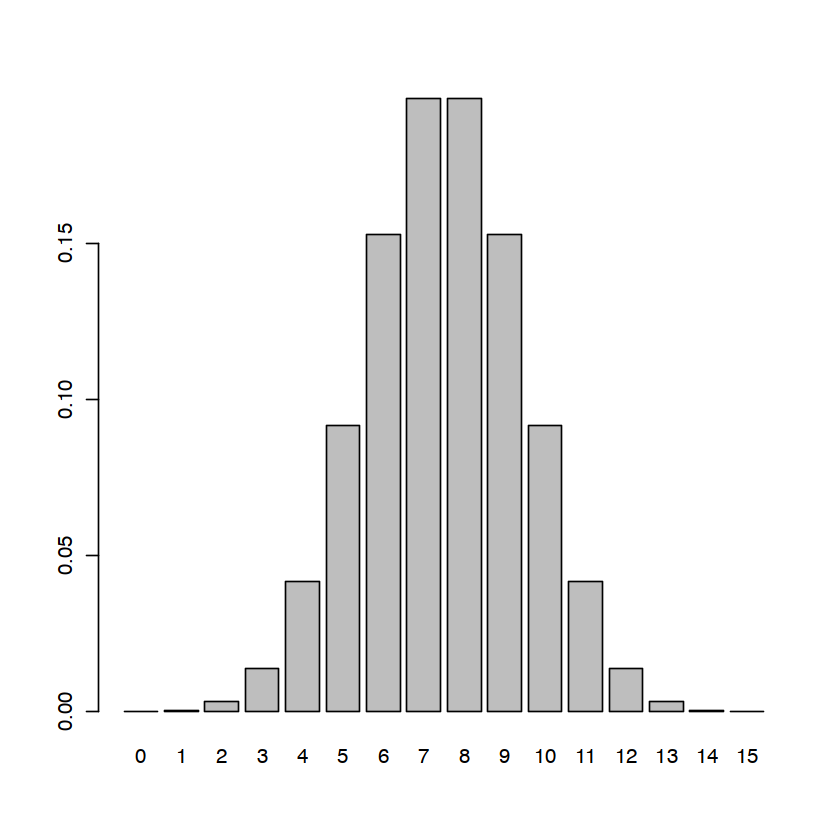

In [45]:
func <- dbinom(0:n, n, p0)
barplot(func, names = 0:n)

In [53]:
dbinom(y, n, p0)
cat(paste("The p-value is obviously larger than alpha (0.05), so we cannot reject the null hypothesis"))

[1] 0.09164429

The p-value is obviously larger than alpha (0.05), so we cannot reject the null hypothesis

In [57]:
p.value <- 0
for(i in 0:n){
    p.value <- p.value + dbinom(i, n, p0)
    if(p.value >= 0.025) break
}
min <- i - 1

p.value <- 0
for(i in 0:n){
    p.value <- p.value + dbinom(i, n, p0)
    if(p.value >= 0.975) break
}
max <- i + 1

min; max

[1] 3

[1] 12

### Bayesian

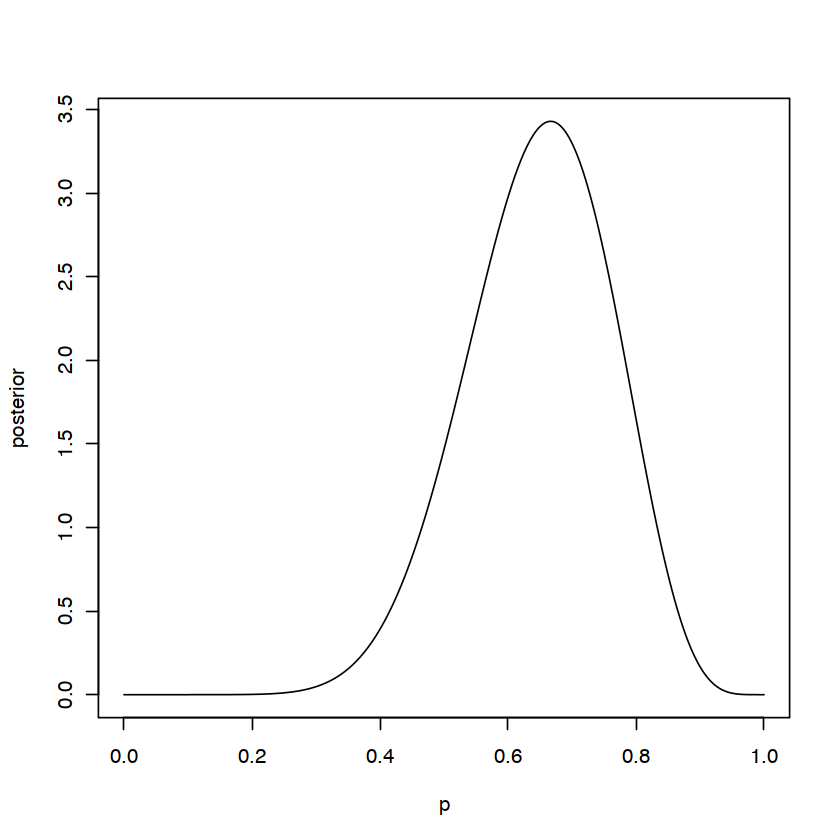

In [60]:
p <- seq(0, 1, 0.001)
posterior <- dbeta(p, 1+y, 1+n-y)
plot(p, posterior, type = 'l')

In [62]:
min <- qbeta(0.025, 1+y, 1+n-y)
max <- qbeta(0.975, 1+y, 1+n-y)
min; max

cat(paste("p = 0.5 lies in the acceptance region"))

[1] 0.4133794

[1] 0.8480163

p = 0.5 lies in the acceptance region